In [259]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pylab as pylab
import scienceplots
import h5py
from astropy.visualization import ImageNormalize, AsinhStretch, LogStretch
from astropy.io import fits
import h5py
import torch

In [19]:
def show(file): 
    with h5py.File(file, "r") as hdf: 
        hdf.keys()
        samples = np.array(hdf["model"])
    return samples

In [199]:
posteriors_hd14 = show("/home/mjybarth/projects/rrg-lplevass/data/hd143006/euler/vp_probes_10.h5")

/tmp/ipykernel_28255/4046709737.py:4: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  samples = np.array(hdf["model"])


In [200]:
sample_hd14 = posteriors_hd14[0, 0]#np.mean(posteriors_hd14, axis = 0)[0]

In [201]:
posteriors_hd14 = show("/home/mjybarth/projects/rrg-lplevass/data/hd143006/euler/vp_probes_10.h5")
sample_hd14_2 = posteriors_hd14[1, 0]

/tmp/ipykernel_28255/4046709737.py:4: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  samples = np.array(hdf["model"])


In [202]:
posteriors_as209 = show("/home/mjybarth/projects/rrg-lplevass/data/as209/euler/vp_probes_2.h5")

/tmp/ipykernel_28255/4046709737.py:4: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  samples = np.array(hdf["model"])


In [203]:
sample_as209 = posteriors_as209[0,0]
sample_as209_2 = posteriors_as209[1,0]

In [204]:
mpol_hd14 = np.load("/home/mjybarth/scratch/diffusion-radio-astronomy/notebooks/notebooks_by_misha/HD143006_continuum_mpol.npy")[0]

In [205]:
mpol_as209 = np.load("/home/mjybarth/scratch/diffusion-radio-astronomy/notebooks/notebooks_by_misha/as209_continuum_mpol.npy")[0]

In [206]:
dirname = "/home/mjybarth/scratch/dsharp/"
fname = dirname + "AS209_continuum.fits"
hdul = fits.open(fname)
hdu_209 = hdul[0]
clean_img_as209 = np.squeeze(hdu_209.data)
header_209 = hdu_209.header
hdul.close()

In [207]:
dirname = "/home/mjybarth/projects/rrg-lplevass/data/misha_dsharp_data/"
fname = dirname + "HD143006_continuum.fits"
hdul = fits.open(fname)
hdu = hdul[0]
clean_img = np.squeeze(hdu.data)
header = hdu.header
hdul.close()

In [208]:
# get the number of pixels in each direction
nx = header["NAXIS1"]
ny = header["NAXIS2"]
# RA coordinates
CDELT1 = 3600 * header["CDELT1"]  # Convert from units of degrees to arcsec

# DEC coordinates
CDELT2 = 3600 * header["CDELT2"]  # [arcsec]

# calculate the RA and DEC pixel centers
RA = (np.arange(nx) - nx / 2) * CDELT1  # [arcsec]
DEC = (np.arange(ny) - ny / 2) * CDELT2  # [arcsec]

# matplotlib imshow extent needs to include extra half-pixels.
ext = (
    RA[0] - CDELT1 / 2,
    RA[-1] + CDELT1 / 2,
    DEC[0] - CDELT2 / 2,
    DEC[-1] + CDELT2 / 2,
)  # [arcsec]

nx_as209 = header_209["NAXIS1"]
ny_as209 = header_209["NAXIS2"]
# RA coordinates
CDELT1_as209 = 3600 * header_209["CDELT1"]  # Convert from units of degrees to arcsec

In [209]:
fov_hd14 = 256*0.004
fov_as209 = 256*0.009

In [210]:
fov_mpol_hd14 = len(mpol_hd14)*0.003
fov_cleanhd14 = np.abs(nx*CDELT1)
fov_mpol_as209 = len(mpol_as209)*0.009
fov_cleanas209 = np.abs(nx_as209*CDELT1_as209)

In [211]:
npix_reduce_mpolhd14 = int((len(mpol_hd14) - (fov_hd14/fov_mpol_hd14 * len(mpol_hd14))) / 2)
npix_reduce_mpolas209 = int((len(mpol_as209) - (fov_as209/fov_mpol_as209 * len(mpol_as209))) / 2)

In [212]:
npix_reduce_cleanhd14 = int((nx - (fov_hd14/fov_cleanhd14 * nx)) / 2)
npix_reduce_cleanas209 = int((nx_as209 - (fov_as209/fov_cleanas209 * nx_as209)) / 2)

In [213]:
np.max(image1)

0.0006733352

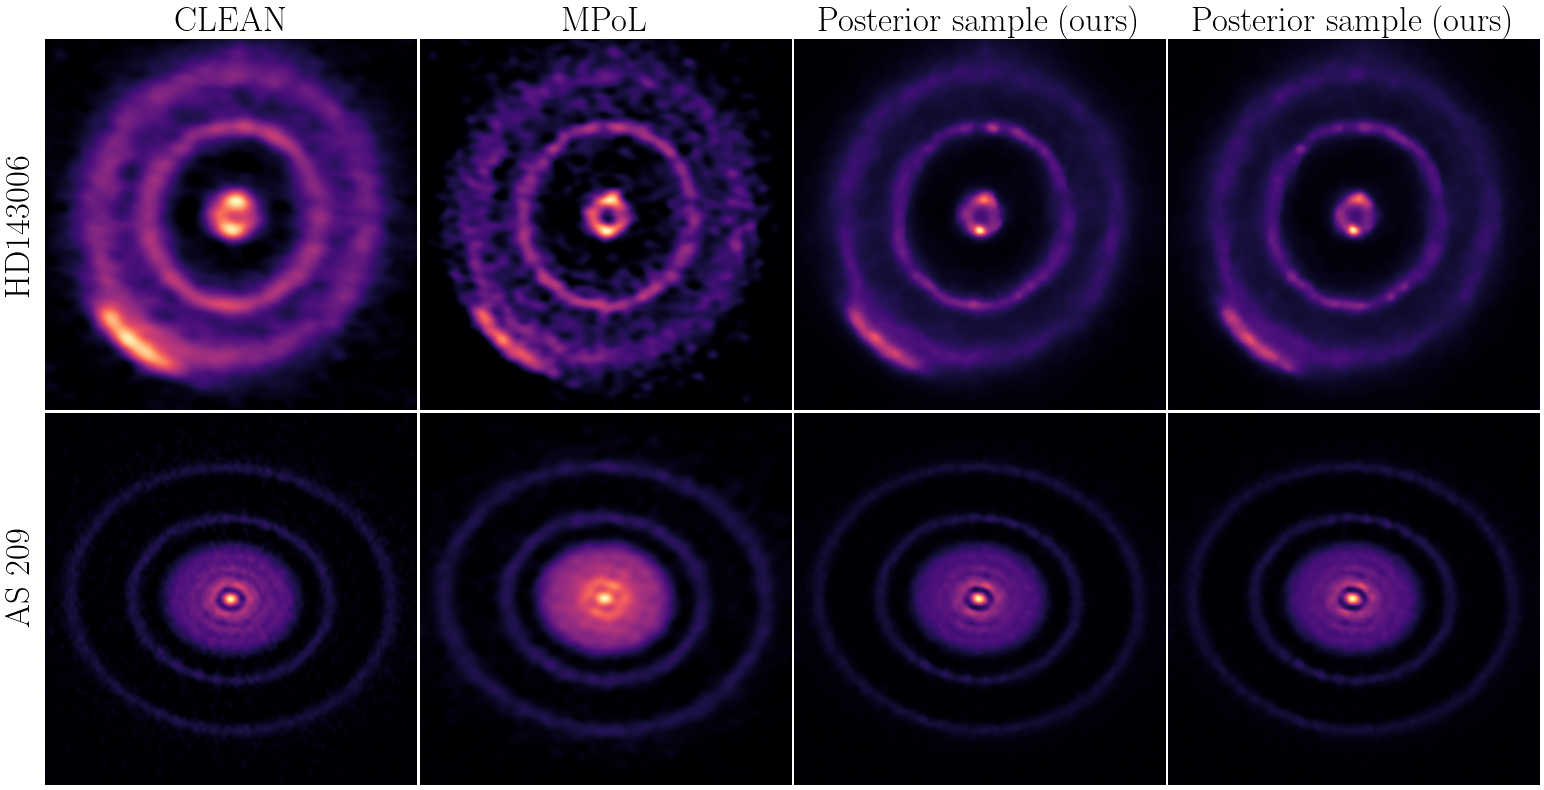

In [264]:
params = {
         'axes.labelsize': 25,
         'axes.titlesize': 15,
         'ytick.labelsize' :20,
         'xtick.labelsize' :20,
         'xtick.major.size': 8,
         'xtick.minor.size': 4,
         'xtick.major.width': 1,
         'xtick.minor.width': 1,
         'ytick.color': "k",
         'xtick.color': "k",
         'axes.labelcolor': "k",
         'ytick.labelcolor' : "k",
         'xtick.labelcolor' : "k",
         }
pylab.rcParams.update(params)
plt.style.use("science")
norm_hd14 = ImageNormalize(sample_hd14[None, None, ...], stretch = AsinhStretch(), vmin = 0)
norm_hd16 = ImageNormalize(sample_hd16[None, None, ...], stretch = AsinhStretch(), vmin = 0)
# Set the figure size and dpi for good sizes and resolution
fig, axs = plt.subplots(2, 4, figsize = (15, 8))  # Increase the height to accommodate the titles

# Create some sample images (you can replace these with your own images)
image1 = clean_img[npix_reduce_cleanhd14:-npix_reduce_cleanhd14, npix_reduce_cleanhd14:-npix_reduce_cleanhd14]
image2 = mpol_hd14[npix_reduce_mpolhd14:-npix_reduce_mpolhd14, npix_reduce_mpolhd14:-npix_reduce_mpolhd14]
image3 = sample_hd14[..., ::-1]
image4 = sample_hd14_2[..., ::-1]
image6 = clean_img_as209[npix_reduce_cleanas209:-npix_reduce_cleanas209, npix_reduce_cleanas209:-npix_reduce_cleanas209]
image7 = mpol_as209[npix_reduce_mpolas209:-npix_reduce_mpolas209, npix_reduce_mpolas209:-npix_reduce_mpolas209]
image8 = sample_as209[..., ::-1]
image9 = sample_as209_2[..., ::-1]

# TRY plt something visible 
for i in range(2):
    for j in range(4):
        axs[i, j].axis("off")


cmap = "magma"
cmap_res = "bwr"
vmax = 1
vmin = 0
# Target 1
axs[0, 0].imshow(image1/np.max(image1), cmap = cmap, origin = "lower", vmin = vmin, vmax = vmax)
axs[0, 0].set_title('CLEAN', fontsize = 25)  # Adjust the fontsize for the title
axs[0, 0].set_ylabel("HD143006")
axs[0, 1].imshow(image2/np.max(image2), cmap= cmap, origin = "lower", vmin = vmin, vmax = vmax)
axs[0, 1].set_title('MPoL', fontsize = 25)
axs[0, 1].set_ylabel("HD163296")
axs[0, 2].imshow(image3/np.max(image3), cmap= cmap, origin = "lower", vmin = vmin, vmax = vmax)
axs[0, 2].set_title('Posterior sample (ours)', fontsize = 25)
axs[0, 3].imshow(image4/np.max(image4), cmap= cmap, origin = "lower", vmin = vmin, vmax = vmax)
axs[0, 3].set_title(r'Posterior sample (ours)', fontsize = 25)


 

# CLEAN
axs[1, 0].imshow(image6/np.max(image6), cmap=cmap, origin = "lower", vmin = vmin, vmax = vmax)

# MPOL
axs[1, 1].imshow(image7/np.max(image7), cmap=cmap, origin = "lower", vmin = vmin, vmax = vmax)

# Posterior sample
axs[1, 2].imshow(image8/np.max(image8), cmap=cmap, origin = "lower", vmin = vmin, vmax = vmax)

# Posterior sample
axs[1, 3].imshow(image9/np.max(image9), cmap= cmap, origin = "lower", vmin = vmin, vmax = vmax)



# Adjust spacing between subplots
fig.tight_layout(pad = 0.2) 

fig.text(-2.5e-2, 0.72, 'HD143006', rotation='vertical', fontsize=25, va='center')
fig.text(-2.5e-2, 0.28, 'AS 209', rotation='vertical', fontsize=25, va='center')
#plt.savefig("figure_residuals.jpeg", bbox_inches = "tight")


# Show the plot (optional)
plt.savefig(fname = "clean_mpol_diffusion.pdf", format = "pdf")
plt.show()

# Residuals

In [19]:
def show(file): 
    with h5py.File(file, "r") as hdf: 
        hdf.keys()
        samples = np.array(hdf["model"])
    return samples

In [47]:
posteriors_hd14 = show("/home/mjybarth/projects/rrg-lplevass/data/hd143006/euler/vp_probes_10.h5")

/tmp/ipykernel_28255/4046709737.py:4: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  samples = np.array(hdf["model"])


In [114]:
posterior_mean_hd14 = np.mean(posteriors_hd14, axis = 0)[..., ::-1]

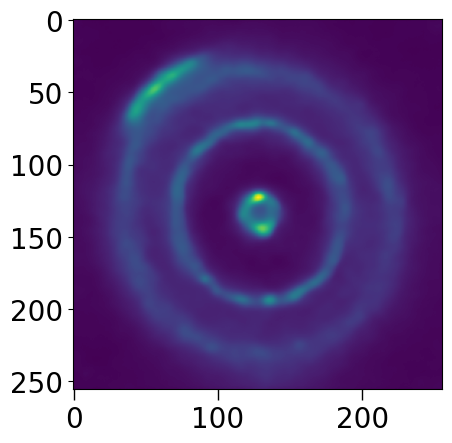

In [115]:
plt.imshow(posterior_mean_hd14[0])

In [104]:
gridded_vis_hd14 = np.load("/home/mjybarth/projects/rrg-lplevass/data/hd143006_4096_gridded_sinc.npz")

In [105]:
vis_bin_re_hd14 = gridded_vis_hd14["vis_bin_re"]
vis_bin_imag_hd14 = gridded_vis_hd14["vis_bin_imag"]
counts = gridded_vis_hd14["counts"]
std_bin_re_hd14 = gridded_vis_hd14["std_bin_re"]
std_bin_imag_hd14 = gridded_vis_hd14["std_bin_imag"]
mask = torch.tensor(counts > 0)

In [106]:
def grid(pixel_scale, img_size): 
    """Given a pixel scale and a number of pixels in image space, grid the associated Fourier space

    Args:
        pixel_scale (float): Pixel resolution (in arcsec)
        img_size (float/int): Size of the image 

    Returns:
        
    """

    # Arcsec to radians: 
    dl = pixel_scale * (1/3600) * (np.pi/180)
    dm = pixel_scale * (1/3600) * (np.pi/180)

    du = 1 / (img_size * dl) * 1e-3 # klambda
    dv = 1 / (img_size * dm) * 1e-3 # klambda

    u_min = -img_size//2 * du 
    u_max = img_size//2 * du 

    v_min = -img_size//2 * dv
    v_max = img_size//2 * dv

    u_edges = np.linspace(u_min, u_max, img_size + 1)
    v_edges = np.linspace(v_min, v_max, img_size + 1)

    return u_edges, v_edges

def noise_padding(x, pad, sigma):
    H, W = x.shape
    out = torch.nn.functional.pad(x, (pad, pad, pad, pad)) 
    # Create a mask for padding region
    mask = torch.ones_like(out)
    mask[pad:pad + H, pad:pad+W] = 0.
    # Noise pad around the model
    z = torch.randn_like(out) * sigma
    out = out + z * mask
    return out

In [107]:
mask.shape

torch.Size([4096, 4096])

In [108]:
pixel_scale = 0.004
# pad = 768//2 # padding to 1024 pixels
pad = (4096 - 256)//2 # padding to 2048
# pad = 128 # padding to 512
img_size = 256
npix = img_size + 2 * pad
u_edges, v_edges = grid(pixel_scale = pixel_scale, img_size = npix)
pixel_size = u_edges[1] - u_edges[0] # this is delta_u, and we should probably call it that in the future. My bad

# C = 0.5 # VE prior
# B = 0.5 # VE
C = 1 # VP prior
B = 0 # VP
def link_function(x):
    return C * x + B

def ft(x): 
    return torch.fft.fft2(x, norm = "ortho")

def model(x):
    x = x.reshape(img_size, img_size) # for the FFT 
    x = noise_padding(x, pad=pad, sigma=0)
    x = link_function(x) # map from model unit space to real unit space
    #x = real_window * x
    vis_full = ft(torch.fft.fftshift(x)) 
    vis_sampled = vis_full
    return vis_sampled.real*mask, vis_sampled.imag*mask

In [109]:
vis_posterior_re, vis_posterior_imag = model(torch.tensor(posterior_mean_hd14[0]))

ValueError: At least one stride in the given numpy array is negative, and tensors with negative strides are not currently supported. (You can probably work around this by making a copy of your array  with array.copy().) 

In [110]:
torch.max(vis_posterior_re - vis_bin_re_hd14)

tensor(0.2880, dtype=torch.float64)

/tmp/ipykernel_28255/2898445541.py:3: RuntimeWarning: invalid value encountered in divide
  resid = (vis_posterior_re - vis_bin_re_hd14)/std_bin_re_hd14


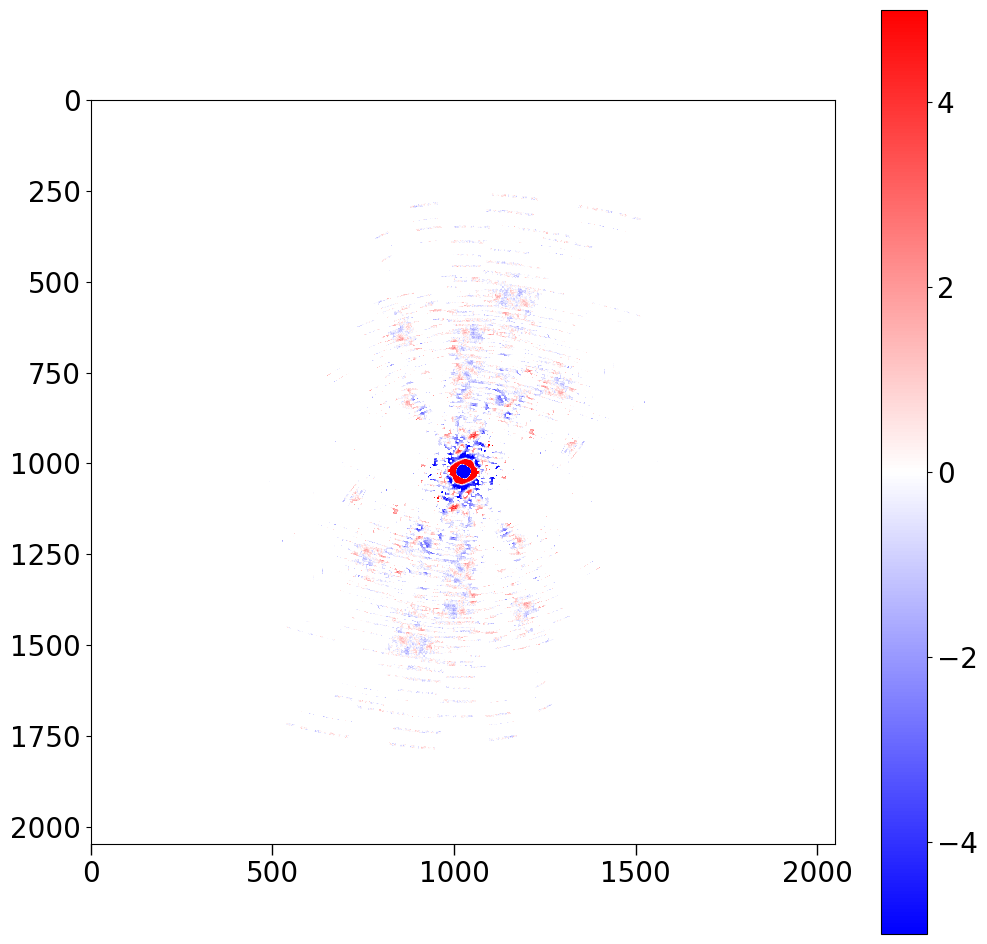

In [111]:
plt.figure(figsize = (12, 12))
#norm = ImageNormalize((vis_posterior_re - vis_bin_re_hd14).numpy(), vmin = 0)
resid = (vis_posterior_re - vis_bin_re_hd14)/std_bin_re_hd14
residuals = resid[1024:-1024, 1024:-1024]
plt.imshow(residuals, vmin = -5, vmax = 5, cmap = "bwr")
plt.colorbar()
plt.show()

/tmp/ipykernel_28255/2180442011.py:3: RuntimeWarning: invalid value encountered in divide
  resid = (vis_posterior_imag - vis_bin_imag_hd14)/std_bin_imag_hd14


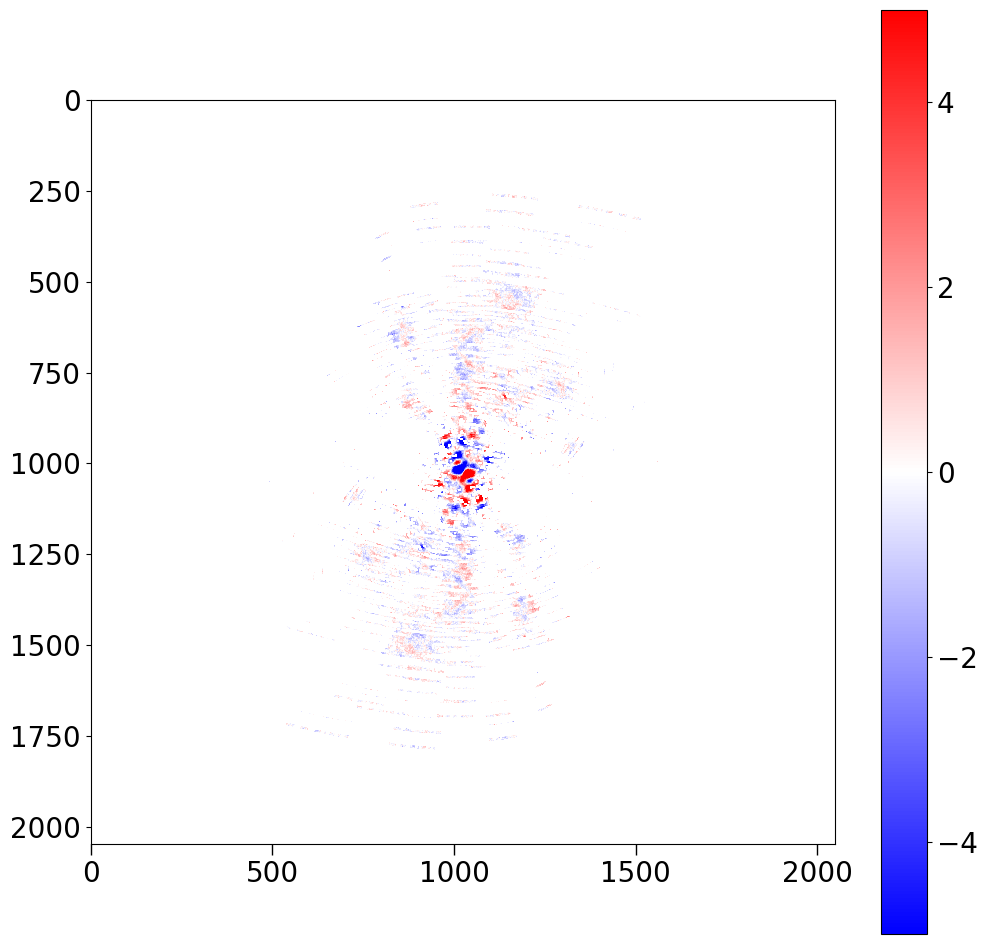

In [58]:
plt.figure(figsize = (12, 12))
#norm = ImageNormalize((vis_posterior_re - vis_bin_re_hd14).numpy(), vmin = 0)
resid = (vis_posterior_imag - vis_bin_imag_hd14)/std_bin_imag_hd14
residuals = resid[1024:-1024, 1024:-1024]
plt.imshow(residuals, vmin = -5, vmax = 5, cmap = "bwr")
plt.colorbar()
plt.show()

In [119]:
vis_posterior_re_fs, _ = torch.sort(vis_posterior_re_f)

In [ ]:
vis_posterior_re_f = vis_posterior_re.flatten()
vis_bin_re_hd14_f = vis_bin_re_hd14.flatten()
plt.plot(np.linspace(0, len(vis_posterior_re_f), len(vis_posterior_re_f)), vis_posterior_re_fs)
